In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezanejati36","key":"f1c8eb9a099e2d4f2c2eace3588270ac"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 13.6MB/s]


In [5]:
!ls

kaggle.json  mobile-price-classification.zip  sample_data


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
df=pd.read_csv('/content/files/train.csv')

In [8]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Task 1

**cleen data**

### Find the null data

In [10]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

there are no missing values

---


### Find the outlier data with z-score

In [11]:
from scipy import stats

z = np.abs(stats.zscore(df))
z

array([[0.90259726, 0.9900495 , 0.83077942, ..., 1.00601811, 0.98609664,
        0.4472136 ],
       [0.49513857, 1.0100505 , 1.2530642 , ..., 0.99401789, 1.01409939,
        0.4472136 ],
       [1.5376865 , 1.0100505 , 1.2530642 , ..., 0.99401789, 1.01409939,
        0.4472136 ],
       ...,
       [1.53077336, 0.9900495 , 0.76274805, ..., 0.99401789, 1.01409939,
        1.34164079],
       [0.62252745, 0.9900495 , 0.76274805, ..., 0.99401789, 0.98609664,
        1.34164079],
       [1.65833069, 1.0100505 , 0.58562134, ..., 0.99401789, 0.98609664,
        1.34164079]])

In [12]:
np.where(z > 3)

(array([  95,  226,  305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,
        1888]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))

we can ignore from outlier data because they aren't very much

---


# Task 2

**Data analysis and visualization**

In [13]:
pd.set_option('display.max_columns', None)
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object



---


create a correlation plot to understand the correlation between the features

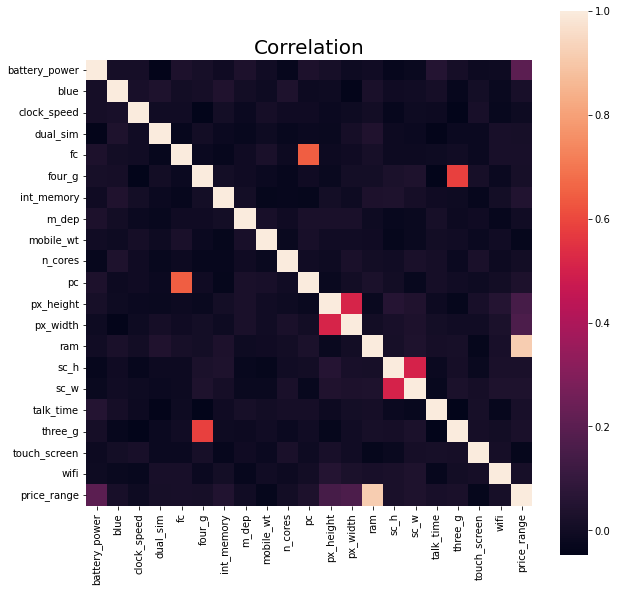

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), square = True)
plt.title('Correlation', fontsize = 20)
plt.show()

as we see, Price_Range has strong correlation with RAM.

after that Price_Range has correlation with px_width, px_height and battery_power

also:

fc and pc

three_g and four_g

px_width and px_height

sc_h and sc_w

---



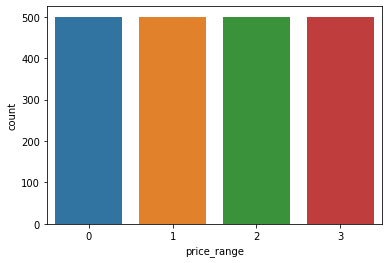

In [16]:
sns.countplot(data = df , x = "price_range" )
plt.show()

The number of records in each range is equal 

---



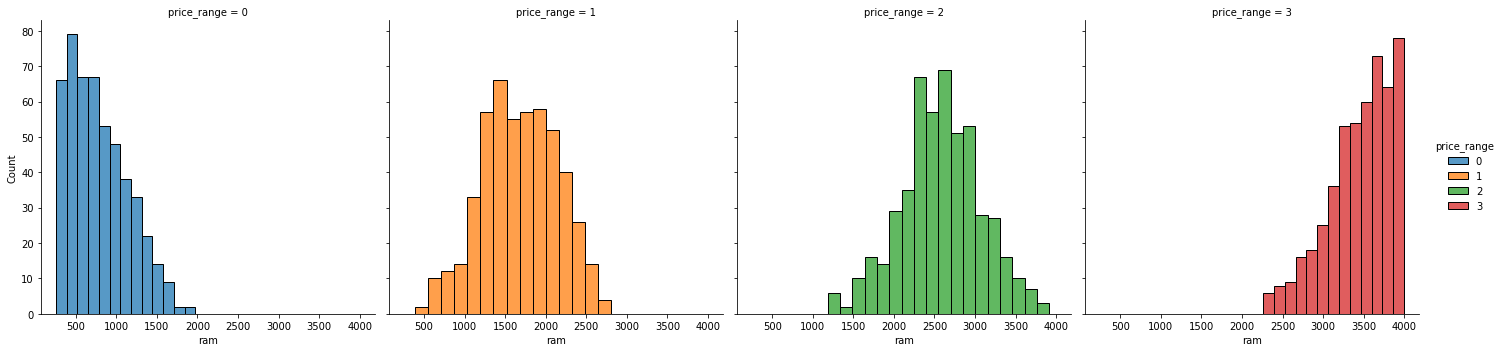

In [17]:
g = sns.FacetGrid(df, col = "price_range", hue = "price_range", height = 5)
g = (g.map(sns.histplot, "ram").add_legend())

the price_range has a positive correlation with RAM

price_range_0 : RAM ranges between 0 to 2000 megabytes

price_range_1 : RAM ranges between 0 to 3000 megabytes

price_range_2 : RAM ranges between 1000 to 4000 megabytes

price_range_3 : RAM ranges between 2000 to 4000 megabytes

---



plot for distribution of boolean features

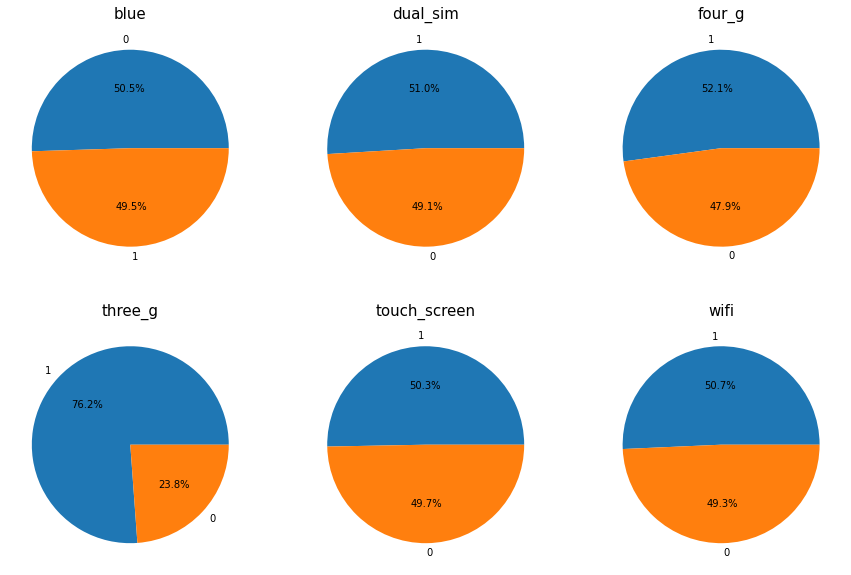

In [18]:
features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

count = 0
plt.figure(figsize=(15,10))
for i in features:
    
    labels = df[i].value_counts().index
    sizes = df[i].value_counts().values  
    
    plt.subplot(2,3,count+1)
    plt.pie(sizes, labels = labels, autopct='%1.1f%%')
    plt.title(features[count], color = 'black',fontsize = 15)
    count += 1

plt.show()

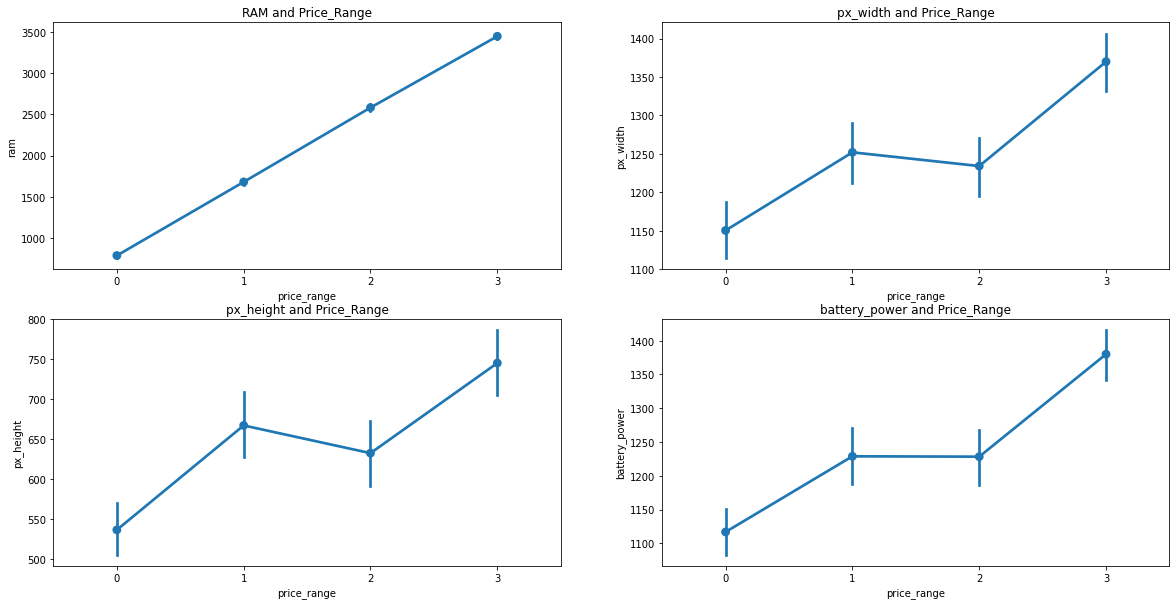

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.pointplot(data=df, x="price_range", y="ram").set_title('RAM and Price_Range')
plt.subplot(2,2,2)
sns.pointplot(data=df, x="price_range", y="px_width").set_title('px_width and Price_Range')
plt.subplot(2,2,3)
sns.pointplot(data=df, x="price_range", y="px_height").set_title('px_height and Price_Range')
plt.subplot(2,2,4)
sns.pointplot(data=df, x="price_range", y="battery_power").set_title('battery_power and Price_Range')
plt.show()

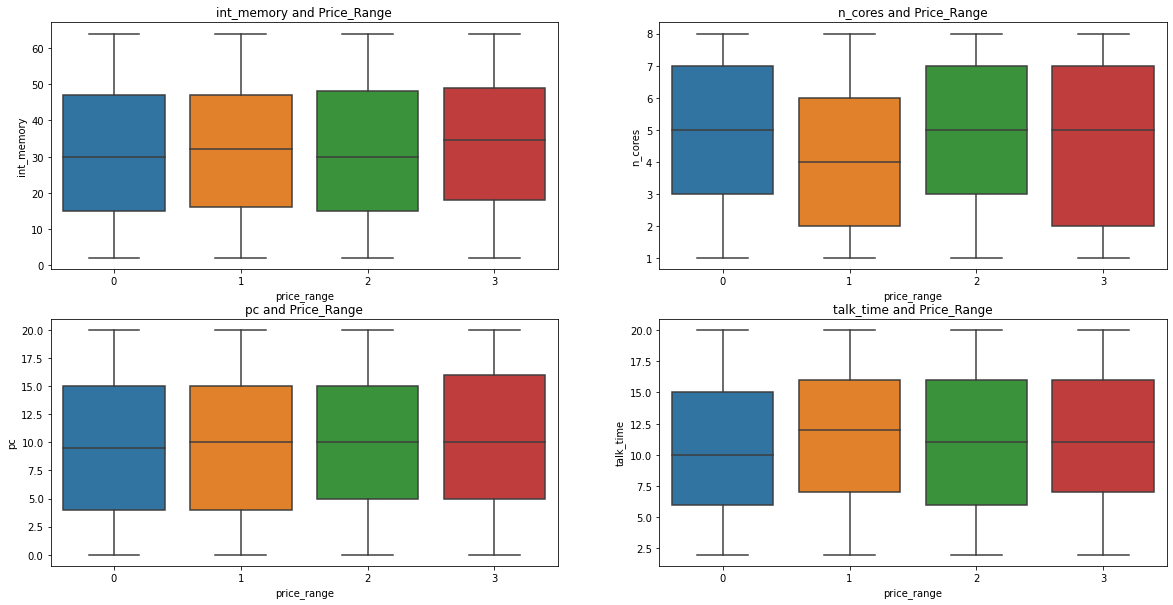

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=df, x="price_range", y="int_memory").set_title('int_memory and Price_Range')
plt.subplot(2,2,2)
sns.boxplot(data=df, x="price_range", y="n_cores").set_title('n_cores and Price_Range')
plt.subplot(2,2,3)
sns.boxplot(data=df, x="price_range", y="pc").set_title('pc and Price_Range')
plt.subplot(2,2,4)
sns.boxplot(data=df, x="price_range", y="talk_time").set_title('talk_time and Price_Range')
plt.show()

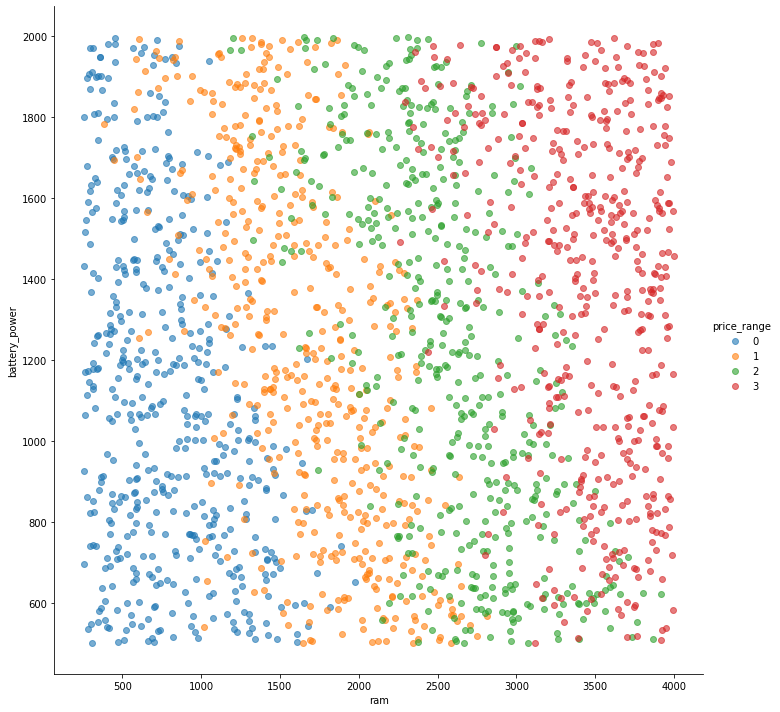

In [21]:
g = sns.FacetGrid(df,hue = 'price_range', height = 10)
g.map(plt.scatter, 'ram','battery_power',alpha = 0.6)
g.add_legend()

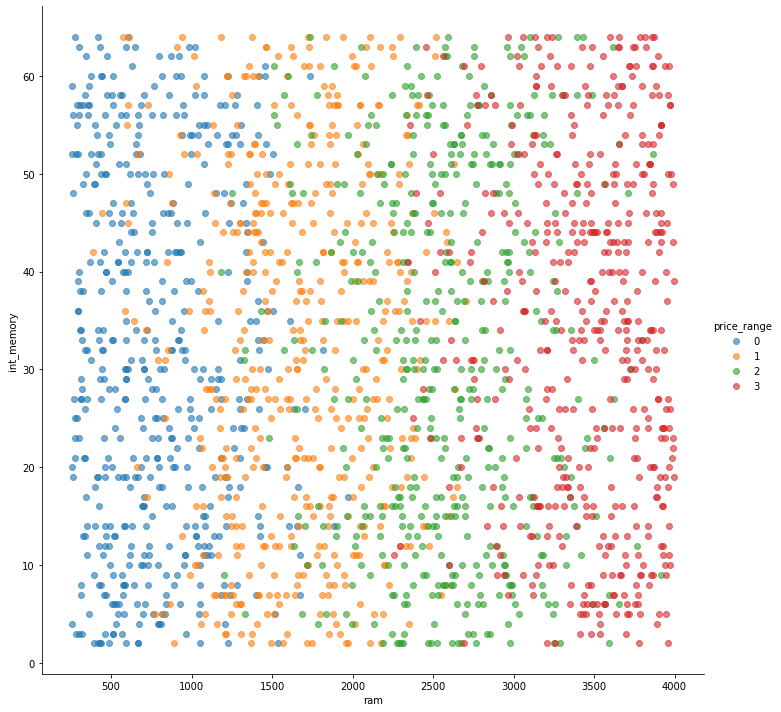

In [22]:
g = sns.FacetGrid(df,hue = 'price_range', height = 10)
g.map(plt.scatter, 'ram','int_memory',alpha = 0.6)
g.add_legend()

# Task 3

## Test 1: 
The Primary Camera effects on Front Camera (correlation test using Pearson)

In [23]:
from scipy.stats import pearsonr
alpha = 0.05
tstat, p_value = pearsonr(df['pc'], df['fc'])

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("\nreject null hypothesis")
else:
    print("\naccept null hypothesis")


t stat : 0.6445952827956327 , p_value : 2.8670926596307177e-235

reject null hypothesis


## Test 2: 
Dual Sim effects on Price Range (2samples T_test)

In [24]:
dual = df[df['dual_sim']== 1]
single = df[df['dual_sim']== 0]
 
tstat, p_value = stats.ttest_ind(dual.price_range, single.price_range, equal_var = False)

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("\nreject null hypothesis")
else:
    print("\naccept null hypothesis")

t stat : 0.779999798710159 , p_value : 0.43548346063552545

accept null hypothesis


## Test 3: 
The number of cores effects on Price Range (Chi-Squared Test)

In [25]:
contingency_table = pd.crosstab(df['n_cores'],df['price_range'])
print('contingency_table_values : \n',contingency_table.values)
chi2_stat , p_value , dof , expected = stats.chi2_contingency(contingency_table.values)

print('\ndof : {} , chi2 stat : {} , p_value : {}'.format(dof, chi2_stat, p_value))
print('expected value : \n',expected)

if p_value<= alpha:
    print("\nreject null hypothesis")
else:
    print("\naccept null hypothesis")

contingency_table_values : 
 [[49 76 52 65]
 [69 59 57 62]
 [62 69 56 59]
 [67 76 73 58]
 [59 51 66 70]
 [61 54 57 58]
 [66 55 69 69]
 [67 60 70 59]]

dof : 21 , chi2 stat : 20.524450237054058 , p_value : 0.488293911066102
expected value : 
 [[60.5  60.5  60.5  60.5 ]
 [61.75 61.75 61.75 61.75]
 [61.5  61.5  61.5  61.5 ]
 [68.5  68.5  68.5  68.5 ]
 [61.5  61.5  61.5  61.5 ]
 [57.5  57.5  57.5  57.5 ]
 [64.75 64.75 64.75 64.75]
 [64.   64.   64.   64.  ]]

accept null hypothesis


## Test 4: 
Internal Memory effects on Battery Power (ANOVA)

In [26]:
min = df.int_memory.min()
max = df.int_memory.max()

print('min = {} , max = {}'.format(min , max))

min = 2 , max = 64


In [27]:
low_memory = df[df.int_memory<16]
medium_memory = df[(df.int_memory>=16) & (df.int_memory<32)]
high_memory = df[(df.int_memory>=32) & (df.int_memory<48)]
very_high_memory = df[(df.int_memory>=48) & (df.int_memory<64)]

fstat,p_value = stats.f_oneway(low_memory.battery_power,medium_memory.battery_power,high_memory.battery_power,very_high_memory.battery_power)

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("\nreject null hypothesis")
else:
    print("\naccept null hypothesis")

f stat : 0.410013483956547 , p_value : 0.7458259793676103

accept null hypothesis


## Test 5: 
Wifi effects on Price Range (2samples T_test)

In [28]:
wifi = df[df['wifi']== 1]
witout_wifi = df[df['wifi']== 0]
 
tstat, p_value = stats.ttest_ind(wifi.price_range, witout_wifi.price_range, equal_var = False)

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("\nreject null hypothesis")
else:
    print("\naccept null hypothesis")

t stat : 0.8398668221654281 , p_value : 0.40108360007552013

accept null hypothesis


# Task 4

### Train/Test split

In [29]:
X = df.drop(['price_range'], axis=1)
y = df['price_range']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50, stratify = y)

### Feature selection

In [31]:
selected_columns_1 = X.columns
selected_columns_1

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [32]:
corr = df.corr()
temp = corr['price_range'].sort_values(ascending=False)
temp = temp.drop(temp.index[0])

selected_columns_2 = temp.head(10).index
selected_columns_2

Index(['ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'sc_w',
       'pc', 'three_g', 'sc_h', 'fc'],
      dtype='object')

In [33]:
selected_columns_3 = temp.head(5).index
selected_columns_3

Index(['ram', 'battery_power', 'px_width', 'px_height', 'int_memory'], dtype='object')

In [34]:
X_train_1 = X_train[selected_columns_1]
X_test_1 = X_test[selected_columns_1]

X_train_2 = X_train[selected_columns_2]
X_test_2 = X_test[selected_columns_2]

X_train_3 = X_train[selected_columns_3]
X_test_3 = X_test[selected_columns_3]

## Model 1 : Naive Bayes Model


In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print ("accuracy = ", accuracy)

accuracy =  0.8225




---



In [36]:
model.fit(X_train_1, y_train)
y_predict_NB_1 = model.predict(X_test_1)
accuracy = accuracy_score(y_test, y_predict_NB_1)

print('Naive Bayes Model on first Selected features(all features)')
print(classification_report(y_test, y_predict_NB_1))
print ("accuracy = ", accuracy)

Naive Bayes Model on first Selected features(all features)
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.76      0.78      0.77       100
           2       0.71      0.65      0.68       100
           3       0.85      0.92      0.88       100

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

accuracy =  0.8225


In [37]:
model.fit(X_train_2, y_train)
y_predict_NB_2 = model.predict(X_test_2)
accuracy = accuracy_score(y_test,y_predict_NB_2)

print('Naive Bayes Model on second Selected features')
print(classification_report(y_test, y_predict_NB_1))
print ("accuracy = ", accuracy)

Naive Bayes Model on second Selected features
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.76      0.78      0.77       100
           2       0.71      0.65      0.68       100
           3       0.85      0.92      0.88       100

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

accuracy =  0.805


In [38]:
model.fit(X_train_3, y_train)
y_predict_NB_3 = model.predict(X_test_3)
accuracy = accuracy_score(y_test, y_predict_NB_3)

print('Naive Bayes Model on third Selected features')
print(classification_report(y_test, y_predict_NB_3))
print ("accuracy = ", accuracy)

Naive Bayes Model on third Selected features
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       100
           1       0.73      0.76      0.75       100
           2       0.69      0.61      0.65       100
           3       0.83      0.90      0.86       100

    accuracy                           0.80       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.79      0.80      0.79       400

accuracy =  0.7975


## Model 2 : Logistic Regression Model

find a good accuracy by changing max_iteration

In [39]:
from sklearn.linear_model import LogisticRegression

logestic_model = LogisticRegression()
logestic_model.fit(X_train, y_train)
y_predict = logestic_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)

print ("accuracy = ", accuracy)

accuracy =  0.6525


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [40]:
logestic_model = LogisticRegression(max_iter = 1000)
logestic_model.fit(X_train, y_train)
y_predict = logestic_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)

print ("accuracy = ", accuracy)

accuracy =  0.745


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [41]:
logestic_model = LogisticRegression(max_iter = 2000)
logestic_model.fit(X_train, y_train)
y_predict = logestic_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)

print ("accuracy = ", accuracy)

accuracy =  0.7675


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,




---



In [42]:
logestic_model.fit(X_train_1, y_train)
y_predict_LR_1 = logestic_model.predict(X_test_1)
accuracy = accuracy_score(y_test, y_predict_LR_1)

print('logestic Regression model by max iteration = 2000 on first Selected features(all features)')
print(classification_report(y_test, y_predict_LR_1))
print ("accuracy = ", accuracy)

logestic Regression model by max iteration = 2000 on first Selected features(all features)
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       100
           1       0.74      0.73      0.74       100
           2       0.65      0.62      0.63       100
           3       0.78      0.83      0.80       100

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400

accuracy =  0.7675


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [43]:
logestic_model.fit(X_train_2, y_train)
y_predict_LR_2 = logestic_model.predict(X_test_2)
accuracy = accuracy_score(y_test, y_predict_LR_2)

print('logestic Regression model by max iteration = 2000 on second Selected features')
print(classification_report(y_test, y_predict_LR_2))
print ("accuracy = ", accuracy)

logestic Regression model by max iteration = 2000 on second Selected features
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.61      0.61      0.61       100
           2       0.46      0.32      0.38       100
           3       0.58      0.80      0.68       100

    accuracy                           0.63       400
   macro avg       0.63      0.63      0.62       400
weighted avg       0.63      0.63      0.62       400

accuracy =  0.63


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [44]:
logestic_model.fit(X_train_3, y_train)
y_predict_LR_3 = logestic_model.predict(X_test_3)
accuracy = accuracy_score(y_test,y_predict_LR_3)

print('logestic Regression model by max iteration = 2000 on third Selected features')
print(classification_report(y_test, y_predict_LR_3))
print ("accuracy = ", accuracy)

logestic Regression model by max iteration = 2000 on third Selected features
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       100
           1       0.92      1.00      0.96       100
           2       0.96      0.89      0.92       100
           3       0.93      0.96      0.95       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

accuracy =  0.95


## Model 3 : Random Forest Model

find a good accuracy by changing random_state and n_estimators

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)

print ("accuracy = ", accuracy)

accuracy =  0.885


In [46]:
model = RandomForestClassifier(random_state = 20)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)

print ("accuracy = ", accuracy)

accuracy =  0.9025


In [47]:
model = RandomForestClassifier(random_state = 20, n_estimators = 150)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)

print ("accuracy = ", accuracy)

accuracy =  0.91




---



In [48]:
model.fit(X_train_1, y_train)
y_predict_RF_1 = model.predict(X_test_1)
accuracy = accuracy_score(y_test, y_predict_RF_1)

print('Random Forest Model on first Selected features(all features)')
print(classification_report(y_test, y_predict_RF_1))
print ("accuracy = ", accuracy)

Random Forest Model on first Selected features(all features)
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.87      0.90      0.88       100
           2       0.89      0.83      0.86       100
           3       0.93      0.95      0.94       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

accuracy =  0.91


In [49]:
model.fit(X_train_2, y_train)
y_predict_RF_2 = model.predict(X_test_2)
accuracy = accuracy_score(y_test, y_predict_RF_2)

print('Random Forest Model on second Selected features')
print(classification_report(y_test, y_predict_RF_2))
print ("accuracy = ", accuracy)

Random Forest Model on second Selected features
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.90      0.94      0.92       100
           2       0.90      0.85      0.88       100
           3       0.91      0.93      0.92       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

accuracy =  0.9175


In [50]:
model.fit(X_train_3, y_train)
y_predict_RF_3 = model.predict(X_test_3)
accuracy = accuracy_score(y_test, y_predict_RF_3)

print('Random Forest Model on third Selected features')
print(classification_report(y_test, y_predict_RF_3))
print ("accuracy = ", accuracy)

Random Forest Model on third Selected features
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       100
           1       0.91      0.96      0.94       100
           2       0.90      0.88      0.89       100
           3       0.92      0.92      0.92       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

accuracy =  0.9275




---


*   Random Forest : OVA
*   Logistic Regression : OVA
*   Naive Bayes : OVA

# Task 5

### Confusion Matrix for Random Forest Model results

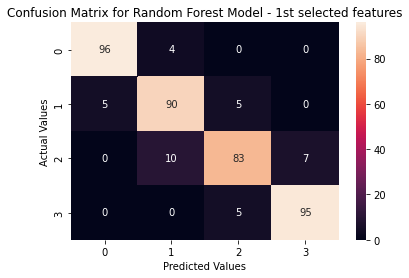

In [51]:
con_matrix = confusion_matrix(y_test, y_predict_RF_1)
sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest Model - 1st selected features')
plt.show()

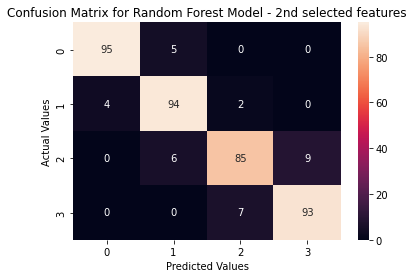

In [52]:
con_matrix = confusion_matrix(y_test, y_predict_RF_2)
sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest Model - 2nd selected features')
plt.show()

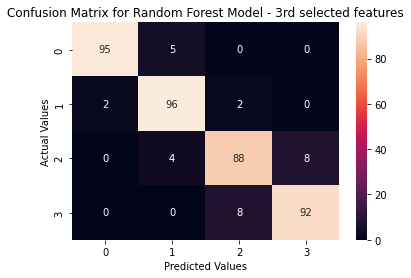

In [53]:
con_matrix = confusion_matrix(y_test, y_predict_RF_3)
sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest Model - 3rd selected features')
plt.show()

### Confusion Matrix for Logistic Regression Model results

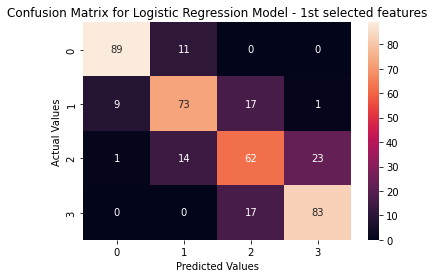

In [54]:
con_matrix = confusion_matrix(y_test, y_predict_LR_1)
sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression Model - 1st selected features')
plt.show()

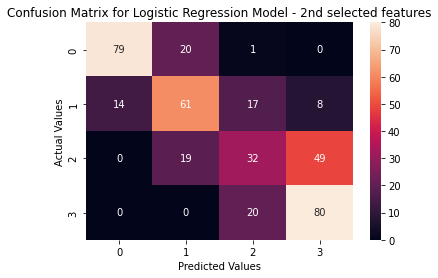

In [55]:
con_matrix = confusion_matrix(y_test, y_predict_LR_2)
sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression Model - 2nd selected features')
plt.show()

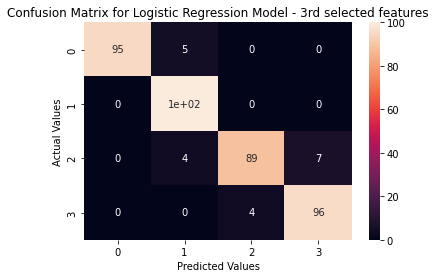

In [56]:
con_matrix = confusion_matrix(y_test, y_predict_LR_3)
sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression Model - 3rd selected features')
plt.show()

### Confusion Matrix for Naive Bayes Model results

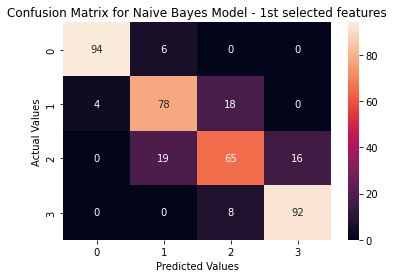

In [57]:
con_matrix = confusion_matrix(y_test, y_predict_NB_1)
sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Naive Bayes Model - 1st selected features')
plt.show()

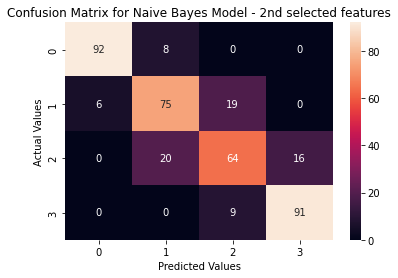

In [58]:
con_matrix = confusion_matrix(y_test, y_predict_NB_2)
sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Naive Bayes Model - 2nd selected features')
plt.show()

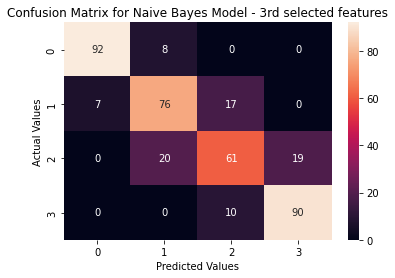

In [59]:
con_matrix = confusion_matrix(y_test, y_predict_NB_3)
sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Naive Bayes Model - 3rd selected features')
plt.show()



---

تمامی مدل ها برای کلاس های 0 و 3 پیش بینی های قابل قبولی داشتند. اما برای کلاس 1 مدل های دوم و سوم و همچنین کلاس 2 همه مدل ها عملکرد ضعیفی داشتند.

زیرا برای اکثر پارامترها روند صعودی که به ازای افزایش کلاس باید طی میکردند در کلاس 2 شکسته شد و همین موضوع باعث شد که مدل ها پیش بینی های اشتباهی در مورد کلاس 2 داشته باشند.



In [60]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

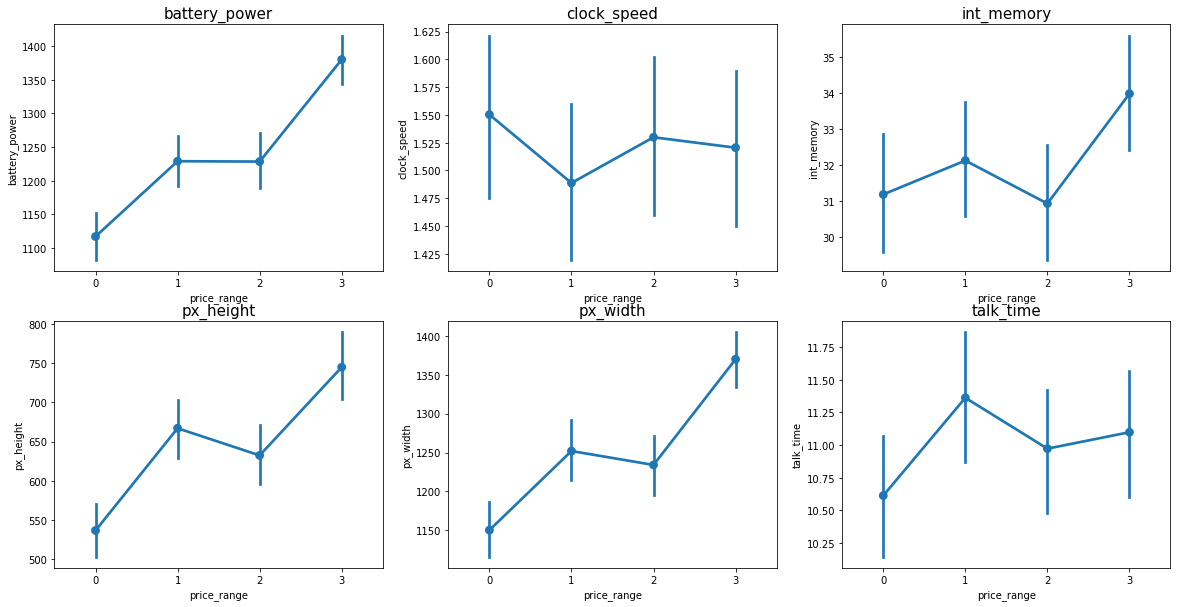

In [61]:
features = ['battery_power', 'clock_speed', 'int_memory', 'px_height', 'px_width', 'talk_time']

count = 0
plt.figure(figsize=(20,10))
for i in features:
  
    plt.subplot(2,3,count+1)
    sns.pointplot(data=df, x="price_range", y = i ,kind = "line")
    plt.title(features[count], color = 'black',fontsize = 15)
    count += 1

plt.show()

# Task 6

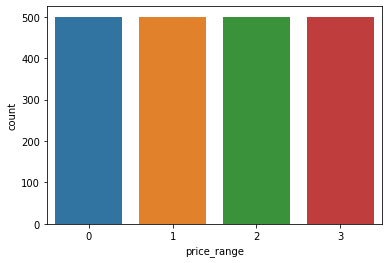

In [62]:
sns.countplot(data = df , x = "price_range" )
plt.show()

The data is balanced because there is an equal amount of data from each class 

**Solutions for imbalanced data:**


1.   Choose Proper Evaluation Metric
2.   Resampling (Oversampling and Undersampling)
1.   SMOTE (Synthetic Minority Oversampling Technique)
1.   BalancedBaggingClassifier
2.   Threshold moving


source: https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/


---



# Task 7

### MinMax Scaler

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_MinMax = scaler.fit_transform(X_train)
X_train_MinMax = pd.DataFrame(X_train_MinMax, columns = X_train.columns)
X_test_MinMax = scaler.transform(X_test)
X_test_MinMax = pd.DataFrame(X_test_MinMax, columns = X_test.columns)

X_test_MinMax.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.431150,0.0,0.12,1.0,0.578947,0.0,0.419355,0.666667,0.650000,0.714286,0.65,0.553571,0.423514,0.633957,0.928571,0.166667,0.722222,1.0,0.0,1.0
1,0.872995,1.0,0.00,1.0,0.052632,0.0,0.467742,0.444444,0.100000,0.142857,0.80,0.364286,0.472946,0.663102,0.285714,0.055556,0.333333,0.0,0.0,1.0
2,0.949198,0.0,0.00,0.0,0.789474,1.0,0.645161,0.555556,0.608333,1.000000,0.80,0.369898,0.923180,0.884492,0.500000,0.055556,0.833333,1.0,0.0,0.0
3,0.921123,0.0,0.00,0.0,0.000000,1.0,0.080645,0.555556,0.200000,0.428571,0.05,0.454082,0.346693,0.725134,0.285714,0.000000,0.055556,1.0,1.0,0.0
4,0.631684,1.0,0.80,1.0,0.105263,0.0,0.112903,0.111111,0.625000,1.000000,0.80,0.376020,0.637943,0.083422,0.500000,0.611111,0.333333,0.0,0.0,0.0


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.87      0.95      0.91       100
           2       0.97      0.85      0.90       100
           3       0.94      0.99      0.97       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.93       400
weighted avg       0.94      0.94      0.93       400

accuracy =  0.935


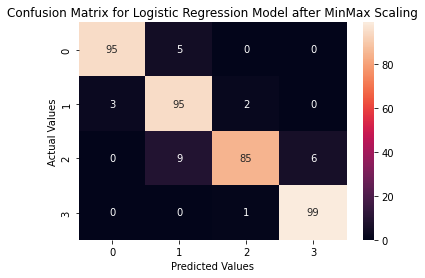

In [64]:
logestic_model.fit(X_train_MinMax, y_train)
y_predict_MinMax = logestic_model.predict(X_test_MinMax)
accuracy = accuracy_score(y_test, y_predict_MinMax)
con_matrix = confusion_matrix(y_test, y_predict_MinMax)

print(classification_report(y_test, y_predict_MinMax))
print ("accuracy = ", accuracy)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression Model after MinMax Scaling')
plt.show()

### StandardScaler

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_STD = scaler.fit_transform(X_train)
X_train_STD = pd.DataFrame(X_train_STD, columns = X_train.columns)
X_test_STD = scaler.transform(X_test)
X_test_STD = pd.DataFrame(X_test_STD, columns = X_test.columns)

X_train_STD.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-1.330190,-1.007528,-1.241718,-1.013846,-0.761777,-1.039531,0.469393,1.710862,1.621447,1.070500,0.003692,-0.704226,-1.547919,0.776506,-0.082185,0.721421,-1.281549,0.564840,0.982650,1.002503
1,-0.263680,-1.007528,-1.241718,0.986343,-0.991574,0.961973,-0.513987,-0.360818,0.686181,-0.234656,-1.473291,0.415489,-0.770666,1.294208,-1.275428,-0.425740,-0.736257,0.564840,-1.017656,-0.997503
2,-0.574183,0.992528,0.478198,0.986343,-0.991574,-1.039531,-1.661264,-1.396658,-0.107378,-0.669708,-0.488635,-1.275416,-1.297342,-0.543726,1.588356,1.409717,1.444910,-1.770414,-1.017656,-0.997503
3,0.073823,0.992528,1.583859,0.986343,2.685177,-1.039531,0.469393,1.710862,1.139643,1.505552,1.152458,-0.525162,-0.489926,0.200354,-0.559482,0.721421,0.899618,-1.770414,-1.017656,1.002503
4,-1.055687,-1.007528,-0.013207,-1.013846,-0.072386,-1.039531,-0.240826,0.675022,0.997936,-0.234656,0.003692,-0.665693,0.626071,-1.482640,-0.559482,-1.343469,0.717854,-1.770414,0.982650,-0.997503


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.93      0.98      0.96       100
           2       0.98      0.93      0.95       100
           3       0.97      0.99      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

accuracy =  0.9675


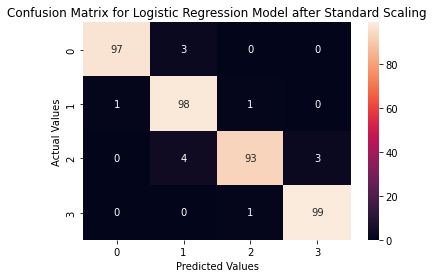

In [66]:
logestic_model.fit(X_train_STD, y_train)
y_predict_STD = logestic_model.predict(X_test_STD)
accuracy = accuracy_score(y_test, y_predict_STD)
con_matrix = confusion_matrix(y_test, y_predict_STD)

print(classification_report(y_test, y_predict_STD))
print ("accuracy = ", accuracy)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression Model after Standard Scaling')
plt.show()

همانطور که مشاهده می شود هر دو روش نتایج را بهبود می دهند و پیش بینی های دقیق تری دارند زیرا با اسکیل کردن مقادیر همه ی پارامترها به بازه های مشخصی تبدیل می شوند و مقادیر های عددی خیلی کوچک یا خیلی بزرگ تاثیر کمتری بر روی نتیجه مدل دارند

---



# Task 8

داده ها در همان تسک 4 به نسبت 80 به 20 تقسیم شدند و به مدل ها داده شدند ونتایج آن ها بررسی شد

---



# Task 9

In [67]:
X_train.shape

(1600, 20)

In [68]:
from sklearn.decomposition import PCA

pca = PCA(0.75)
X_train_pca_1 = pca.fit_transform(X_train)
X_test_pca_1 = pca.transform(X_test)

X_train_pca_1.shape

(1600, 2)

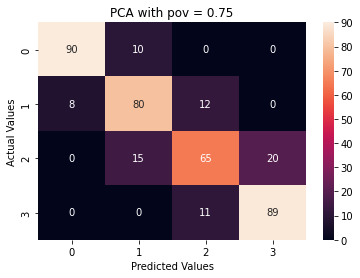

accuracy =  0.81


In [69]:
logestic_model.fit(X_train_pca_1, y_train)
y_predict = logestic_model.predict(X_test_pca_1)
accuracy = accuracy_score(y_test, y_predict)
con_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('PCA with pov = 0.75')
plt.show()

print ("accuracy = ", accuracy)

In [70]:
pca = PCA(0.8)
X_train_pca_2 = pca.fit_transform(X_train)
X_test_pca_2 = pca.transform(X_test)

X_train_pca_2.shape

(1600, 2)

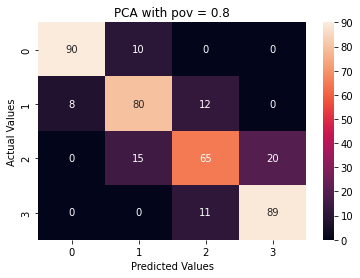

accuracy =  0.81


In [71]:
logestic_model.fit(X_train_pca_2, y_train)
y_predict = logestic_model.predict(X_test_pca_2)
accuracy = accuracy_score(y_test, y_predict)
con_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('PCA with pov = 0.8')
plt.show()

print ("accuracy = ", accuracy)

In [72]:
pca = PCA(0.9)
X_train_pca_3 = pca.fit_transform(X_train)
X_test_pca_3 = pca.transform(X_test)

X_train_pca_3.shape

(1600, 3)

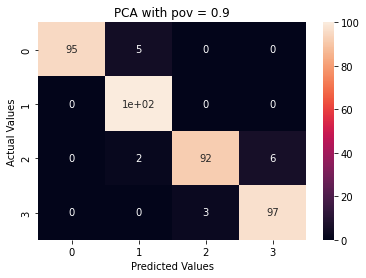

accuracy =  0.96


In [73]:
logestic_model.fit(X_train_pca_3, y_train)
y_predict = logestic_model.predict(X_test_pca_3)
accuracy = accuracy_score(y_test, y_predict)
con_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('PCA with pov = 0.9')
plt.show()

print ("accuracy = ", accuracy)

In [74]:
pca = PCA(0.95)
X_train_pca_4 = pca.fit_transform(X_train)
X_test_pca_4 = pca.transform(X_test)

X_train_pca_4.shape

(1600, 4)

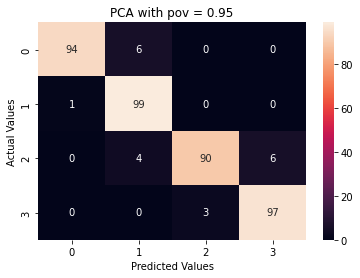

accuracy =  0.95


In [75]:
logestic_model.fit(X_train_pca_4, y_train)
y_predict = logestic_model.predict(X_test_pca_4)
accuracy = accuracy_score(y_test, y_predict)
con_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('PCA with pov = 0.95')
plt.show()

print ("accuracy = ", accuracy)

In [76]:
pca = PCA(0.99)
X_train_pca_5 = pca.fit_transform(X_train)
X_test_pca_5 = pca.transform(X_test)

X_train_pca_5.shape

(1600, 4)

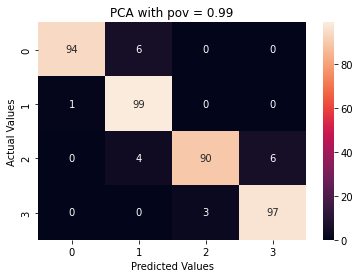

accuracy =  0.95


In [77]:
logestic_model.fit(X_train_pca_5, y_train)
y_predict = logestic_model.predict(X_test_pca_5)
accuracy = accuracy_score(y_test, y_predict)
con_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('PCA with pov = 0.99')
plt.show()

print ("accuracy = ", accuracy)

در مقایسه با حالتی که داده ها اسکیل شده بودند خیلی موجب بهبود نتایج نشده است و دقت مدل تقریبا همان است.




برای کار با داده های حجیم نیاز داریم قبل از انجام امور پردازشی، در صورت امکان، برخی از بعدهایی را که اهمیت زیادی ندارند، حذف کنیم زیرا کار با داده های حجیم بسیار سخت است و در بسیاری از موارد کارایی مدل را نیز کاهش می دهد

---



# Task 10

In [78]:
new_df = df.copy()
new_df['price_range'] = new_df['price_range'].replace([1,2,3],4)
new_df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,4
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,4
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,4
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,4
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,4
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,4
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,4
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [79]:
new_x = new_df.drop(['price_range'], axis=1)
new_y = new_df['price_range']

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size = 0.2, random_state = 50, stratify = new_y)

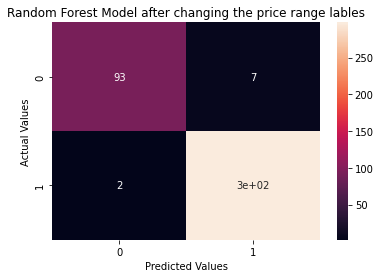

accuracy =  0.9775


In [80]:
model = RandomForestClassifier(random_state = 20, n_estimators = 150)
model.fit(new_x_train, new_y_train)
y_predict = model.predict(new_x_test)
accuracy = accuracy_score(new_y_test, y_predict)
con_matrix = confusion_matrix(new_y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Model after changing the price range lables')
plt.show()

print ("accuracy = ", accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


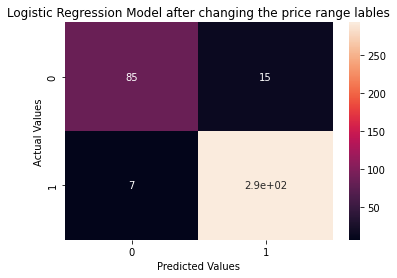

accuracy =  0.945


In [81]:
model = LogisticRegression(max_iter = 2000)
model.fit(new_x_train, new_y_train)
y_predict = model.predict(new_x_test)
accuracy = accuracy_score(new_y_test, y_predict)
con_matrix = confusion_matrix(new_y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression Model after changing the price range lables')
plt.show()

print ("accuracy = ", accuracy)

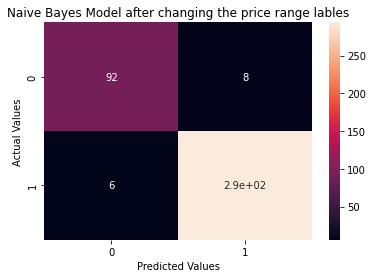

accuracy =  0.965


In [82]:
model = GaussianNB()
model.fit(new_x_train, new_y_train)
y_predict = model.predict(new_x_test)
accuracy = accuracy_score(new_y_test, y_predict)
con_matrix = confusion_matrix(new_y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naive Bayes Model after changing the price range lables')
plt.show()

print ("accuracy = ", accuracy)

نامتوازن کردن داده ها با تغییر لیبل های کلاس قیمت موجب بهبود عملکرد مدل ها شده است 

In [83]:
new_df['price_range'].value_counts()

4    1500
0     500
Name: price_range, dtype: int64

In [84]:
from sklearn.utils import resample

df_majority = new_df[(new_df['price_range'] == 4)] 
df_minority = new_df[(new_df['price_range'] == 0)] 

df_minority_upsampled = resample(df_minority, replace = True, n_samples = 1500, random_state=42)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [85]:
df_upsampled['price_range'].value_counts()

0    1500
4    1500
Name: price_range, dtype: int64

In [86]:
df_upsampled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
463,965,1,1.5,1,5,0,13,1.0,109,2,14,130,998,1138,9,8,10,0,1,0,0
1795,527,0,0.7,1,4,0,53,0.9,128,1,11,67,1924,1302,13,7,13,0,0,0,0
1408,1791,1,0.5,1,1,1,33,0.5,110,5,4,371,682,594,17,8,16,1,0,1,0
1094,688,1,1.5,0,0,0,2,1.0,89,3,2,271,869,391,5,2,8,1,1,1,0
473,932,1,0.5,0,1,1,60,0.7,104,4,2,268,1078,1459,6,1,19,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1,4
1994,858,0,2.2,0,1,0,50,0.1,84,1,2,528,1416,3978,17,16,3,1,1,0,4
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,4
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,4


In [87]:
new_x = df_upsampled.drop(['price_range'], axis=1)
new_y = df_upsampled['price_range']

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size = 0.2, random_state = 50, stratify = new_y)

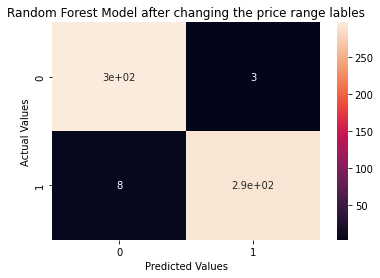

accuracy =  0.9816666666666667


In [88]:
model = RandomForestClassifier(random_state = 20, n_estimators = 150)
model.fit(new_x_train, new_y_train)
y_predict = model.predict(new_x_test)
accuracy = accuracy_score(new_y_test, y_predict)
con_matrix = confusion_matrix(new_y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Model after changing the price range lables')
plt.show()

print ("accuracy = ", accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


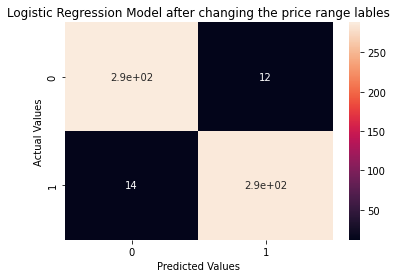

accuracy =  0.9566666666666667


In [89]:
model = LogisticRegression(max_iter = 2000)
model.fit(new_x_train, new_y_train)
y_predict = model.predict(new_x_test)
accuracy = accuracy_score(new_y_test, y_predict)
con_matrix = confusion_matrix(new_y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression Model after changing the price range lables')
plt.show()

print ("accuracy = ", accuracy)

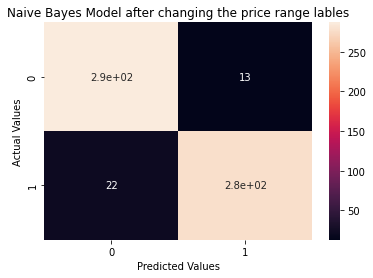

accuracy =  0.9416666666666667


In [90]:
model = GaussianNB()
model.fit(new_x_train, new_y_train)
y_predict = model.predict(new_x_test)
accuracy = accuracy_score(new_y_test, y_predict)
con_matrix = confusion_matrix(new_y_test, y_predict)

sns.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naive Bayes Model after changing the price range lables')
plt.show()

print ("accuracy = ", accuracy)

متوازن کردن داده های نامتوازن با این روش در دو مدل اول کمی باعث بهبود نتایج شده است